In [1]:
%matplotlib notebook

In [2]:
import time
import numpy as np
import matplotlib as mpl

from importlib import reload
from matplotlib import pyplot as plt

from labtools import mplplots; reload(mplplots)
from labtools.mplplots.init_nb_plotting import *
from labtools.mplplots import tools as mpltools

from qcodes.instrument.parameter import ManualParameter
from qcodes.sweep import sweep
from qcodes.sweep.sweep import time_trace

from v2_dataset_tools.experiments import do_experiment, get_results_from_db_path

<IPython.core.display.Javascript object>


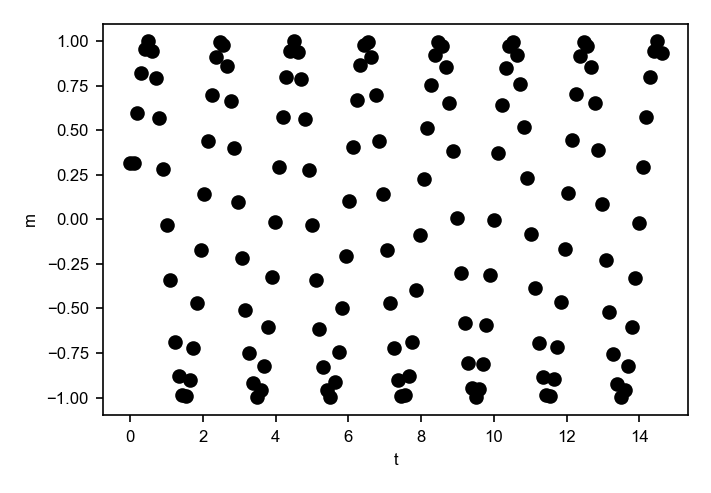

Starting experimental run with id: 31
Completed measurement. Database path: cool_experiment/my_sample/30


In [4]:
# this works, and plots without significant risk for the measurement, which makes it useful in principle.
# however: the way the plotting is written works only for certain measurements, i.e., a measurement that grows along an axis.
# can this be extended such that this is more flexible? say we integrate in the outer loop, and watch the data getting 'smoother'?
# essentially, i want to define my own plot function, and want access to the full data set (if required).

m = ManualParameter("m", unit="A")
m.get = lambda: np.sin((time.time() - t0) * 2 * np.pi / 2)

t0 = None

def start_time():
    global t0
    t0 = time.time()

setup = [(start_time, tuple())]
cleanup = [(lambda: None, tuple())]

result = do_experiment(
    "cool_experiment/my_sample",
    setup,
    time_trace(m, 0.1, 15.0),
    cleanup,
    return_format=["data_set_path"], 
    live_plot_axes=[{"t": 0, "m": 1}]
)